In [4]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import dlmhelper.tools
import dlmhelper.data

The TCCON data is available from [https://data.caltech.edu/records/3t5by-f7e05](https://data.caltech.edu/records/3t5by-f7e05)

In [69]:
path_in = "/path/to/ny20050314_20210919.public.qc.nc"

In [7]:
ds = xr.open_dataset(path_in)
ds

<xarray.Dataset>
Dimensions:                                       (time: 108615,
                                                   prior_altitude: 51,
                                                   ak_altitude: 51)
Coordinates:
  * time                                          (time) datetime64[ns] 2005-...
  * prior_altitude                                (prior_altitude) float32 0....
  * ak_altitude                                   (ak_altitude) float32 0.0 ....
Data variables: (12/75)
    prior_time                                    (time) datetime64[ns] ...
    ak_pressure                                   (ak_altitude) float32 ...
    ak_xco2                                       (time, ak_altitude) float32 ...
    extrapolation_flags_ak_xco2                   (time) int8 ...
    ak_xwco2                                      (time, ak_altitude) float32 ...
    extrapolation_flags_ak_xwco2                  (time) int8 ...
    ...                                            ...
    xlco2_error_experimental                      (time) float32 ...
    xwco2_experimental                            (time) float32 ...
    xwco2_error_experimental                      (time) float32 ...
    xco2                                          (time) float32 ...
    xco2_error                                    (time) float32 ...
    airmass                                       (time) float32 ...
Attributes: (12/16)
    source:                      Products retrieved from solar absorption spe...
    description:                 \nCarbon Dioxide Dry Column-Averaged Mixing ...
    file_creation:               Created with Python 3.7.3; the library netCD...
    title:                       Atmospheric trace gas column-average dry-air...
    data_use_policy:             https://tccon-wiki.caltech.edu/Network_Polic...
    auxiliary_data_description:  https://tccon-wiki.caltech.edu/Network_Polic...
    ...                          ...
    location:                    Ny-Ålesund, Svalbard, Norway
    contact:                     Matthias Buschmann <m_buschmann@iup.physik.u...
    site_reference:              
    data_doi:                    10.14291/tccon.ggg2020.nyalesund01.R0
    data_reference:              M. Buschmann, C. Petri, M. Palm, T. Warneke,...
    data_revision:               R0

In [8]:
time = ds.time.data
data = ds.xch4.data*1000
error = ds.xch4_error.data*1000
product_type ="TCCON.GGG2020"

ds.close()

In [50]:
ts = dlmhelper.data.TimeSeries(data, time64 = time, time_unit='month', error=error, product_type=product_type)

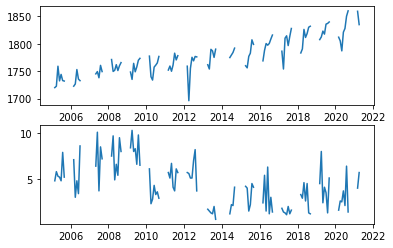

In [51]:
fig, axs = plt.subplots(2,1)

axs[0].plot(ts.time64, ts.data)
axs[1].plot(ts.time64, ts.error)

In [52]:
scores = dlmhelper.tools.cv_dlm_ensemble(ts, level = [True], variable_level=[False], trend = [True], variable_trend=[True]
                                           ,seasonal=[True], seasonal_period=[[12]], seasonal_harmonics=[[[1,2,3,4]]],
                                           variable_seasonal=[[[True, False]]], autoregressive=[None, 1], irregular=[True, False], verbose=0)

In [53]:
results = dlmhelper.tools.dlm_ensemble(ts,"TCCON_NYA", level = [True], variable_level=[False], trend = [True], variable_trend=[True]
                                           ,seasonal=[True], seasonal_period=[[12]], seasonal_harmonics=[[[1,2,3,4]]],
                                           variable_seasonal=[[[True, False]]], autoregressive=[None, 1], irregular=[True, False], scores = scores, verbose=2)

Processed: LTs_SsP12H1_I
Processed: LTs_SsP12H1
Processed: LTs_SsP12H1_A1_I
Processed: LTs_SsP12H1_A1
Processed: LTs_SP12H1_I
Processed: LTs_SP12H1
Processed: LTs_SP12H1_A1_I
Processed: LTs_SP12H1_A1
Processed: LTs_SsP12H2_I
Processed: LTs_SsP12H2
Processed: LTs_SsP12H2_A1_I
Processed: LTs_SsP12H2_A1
Processed: LTs_SP12H2_I
Processed: LTs_SP12H2
Processed: LTs_SP12H2_A1_I
Processed: LTs_SP12H2_A1
Processed: LTs_SsP12H3_I
Processed: LTs_SsP12H3
Processed: LTs_SsP12H3_A1_I
Processed: LTs_SsP12H3_A1
Processed: LTs_SP12H3_I
Processed: LTs_SP12H3
Processed: LTs_SP12H3_A1_I
Processed: LTs_SP12H3_A1
Processed: LTs_SsP12H4_I
Processed: LTs_SsP12H4
Processed: LTs_SsP12H4_A1_I
Processed: LTs_SsP12H4_A1
Processed: LTs_SP12H4_I
Processed: LTs_SP12H4
Processed: LTs_SP12H4_A1_I
Processed: LTs_SP12H4_A1


In [54]:
results.summary(sort="agg")

| Model            | converged   |      aic |       ll |              ssr |        mse |   cov_level |    cov_trend |     cov_seas |          cov_ar |    cv_amse |              agg |
|:-----------------|:------------|---------:|---------:|-----------------:|-----------:|------------:|-------------:|-------------:|----------------:|-----------:|-----------------:|
| LTs_SP12H1_I     | True        |  868.702 | -432.351 |  53289           |    517.369 |     10.7723 |   0.0174997  |      7.70802 |     0           |    211.71  |    230.19        |
| LTs_SP12H1_A1    | True        |  869.323 | -431.661 |  52864.5         |    513.248 |     12.1319 |   0.0185384  |      8.47567 |    92.5495      |    209.724 |    230.331       |
| LTs_SP12H1_A1_I  | True        |  872.702 | -432.351 |  53289.1         |    517.37  |     10.7712 |   0.0174919  |      7.70786 |     1.18152e-06 |    211.877 |    230.356       |
| LTs_SsP12H1_I    | True        |  869.288 | -431.644 |  53339           |    517.85

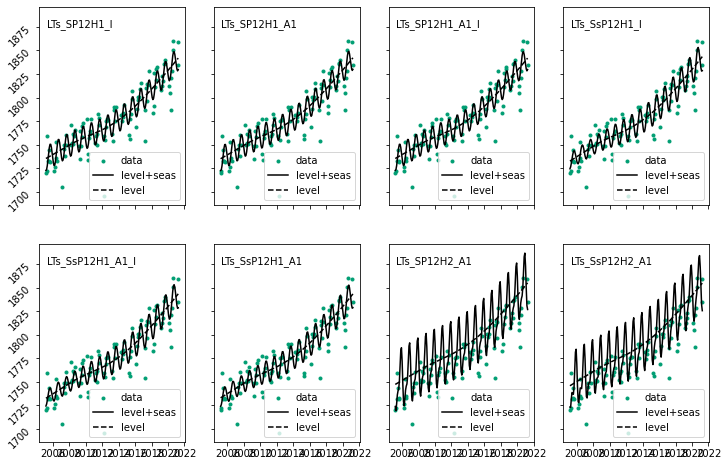

In [68]:
results.plot_summary(sort="agg", num=8, figsize=(12,8))

In [56]:
r=results.get_best_result(sort="agg")

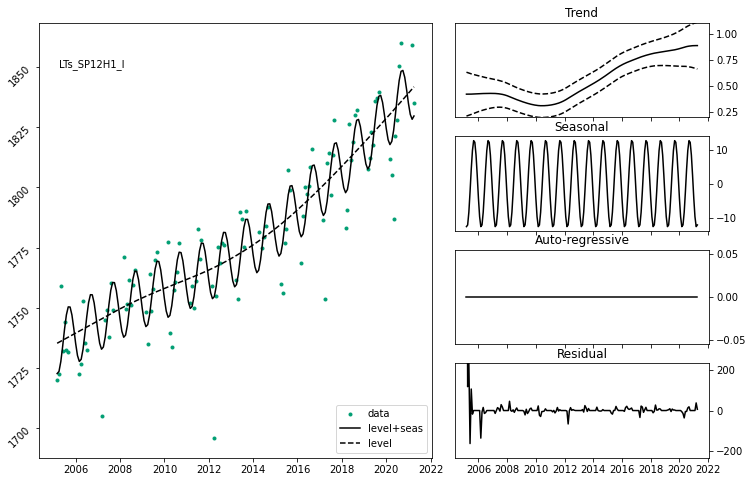

In [57]:
fig = r.plot_summary(figsize=(12,8))